<a href="https://colab.research.google.com/github/sharsh09/GRIP-INTERNSHIP-DSBA/blob/main/GRiP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harsh Singh

Data Science & Business Analytics @ The Spark Foundation (TSF)

Task-2: In this task,we will use the iris dataset, to predict the optimum number of clusters.

Topic: Prediction using UnSupervised ML

To Explore Unsupervised Machine Learning:K-Means Clustering

Batch: September 2023.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Loading Iris Dataset

df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.size

900

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#As we don't need ID column, so we're dropping that column.
data = df.drop(['Id'], axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.shape

(150, 5)

#Data Visualization

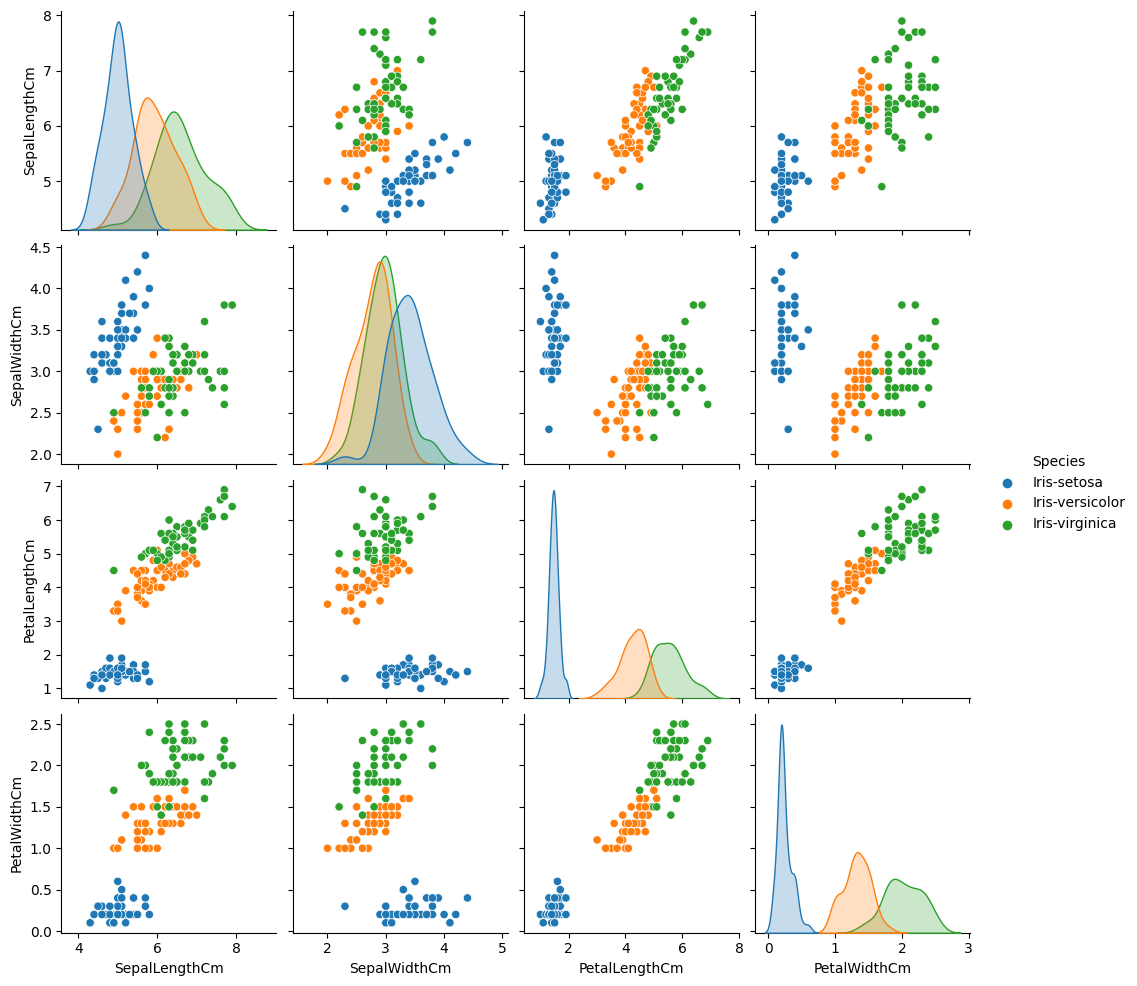

In [ ]:
sns.pairplot(data, hue='Species') #distribution plot for dataset visualiztion

In [ ]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-16-412a574bb882>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="coolwarm",annot=True, fmt=".2f")


<Axes: >

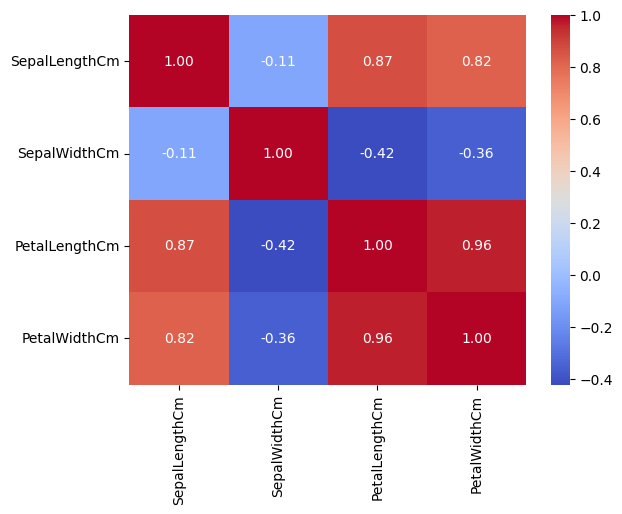

In [ ]:
sns.heatmap(data.corr(), cmap="coolwarm",annot=True, fmt=".2f")

#Finding the optimum number of clusters for k-means classification

In [ ]:
#Input - SepalLengthCm SepalWidthCm PetalLengthCm and PetalWidthCm

x = data.iloc[:,0:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

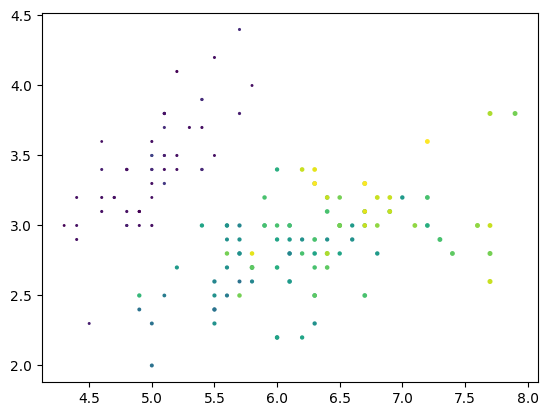

In [ ]:
#VISUALISATION
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], data['PetalLengthCm'], data['PetalWidthCm'])
#Here we have got only one cluster before applying any clustering technique

In [ ]:
#Here our main task is to find out the number of clusters(k)
np.sqrt(150) # 150 is the total no of points
#k value should not exceed the square root of the total no of points
#Hence k value should be in the range of 2 to 15

12.24744871391589

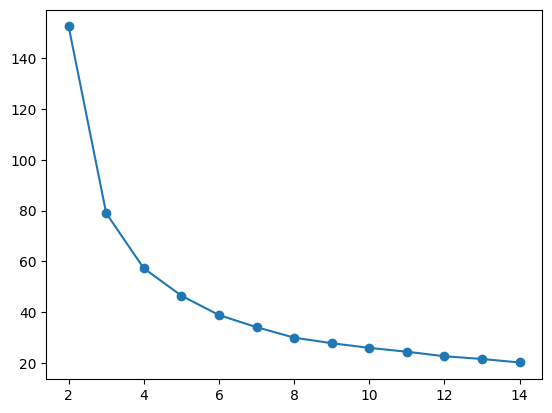

In [ ]:
#1.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15)# my range is in between 2 and 15

sse = [] #blank list

#for i in range(2,15):
for i in k :
  model_demo = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
#We will now consider the point at which the eblow is more prominent(projecting from something)
#We will consider k as 7 for now , but we are not sure

2 Clusters ,Score = 0.6808136202936816
3 Clusters ,Score = 0.5525919445499757
4 Clusters ,Score = 0.4978256901095472
5 Clusters ,Score = 0.49285559183161204
6 Clusters ,Score = 0.36820569682713084
7 Clusters ,Score = 0.3600597997328459
8 Clusters ,Score = 0.3538815380353622
9 Clusters ,Score = 0.33607614995770857
10 Clusters ,Score = 0.33380799465469013
11 Clusters ,Score = 0.3009696133265347
12 Clusters ,Score = 0.3086324782031731
13 Clusters ,Score = 0.29270527858750595
14 Clusters ,Score = 0.2903508875424501


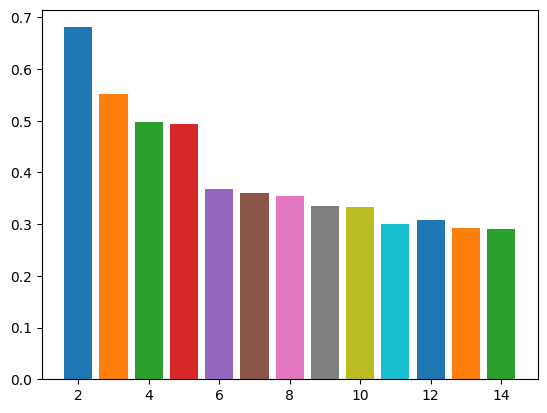

In [ ]:
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k:
  model_demo = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#CONFIRMATION : THE No of CLUSTERS TO BE CONSIDERED IS 2 not 7.

In [ ]:
#Applying Clusterer to the dataset / Creating the kmeans classifier
k = 2
model = KMeans(n_clusters = k,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
model.fit(x)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
y = model.predict(x) # predicted output
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y.size

150

In [ ]:
x[y == 1,1]
#so the first '1' is cluster no 1 and the second '1' is column index 1
#the value of input,when cluster 1 is selected and column index 1 selected

array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.9, 2.7, 2. , 3. , 2.2, 2.9,
       2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
       3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5,
       2.6, 3. , 2.6, 2.7, 3. , 2.9, 2.9, 2.8, 3.3, 2.7, 3. , 2.9, 3. ,
       3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8,
       2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8,
       3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7, 3.2,
       3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
np.unique(y,return_counts = True)

(array([0, 1], dtype=int32), array([53, 97]))

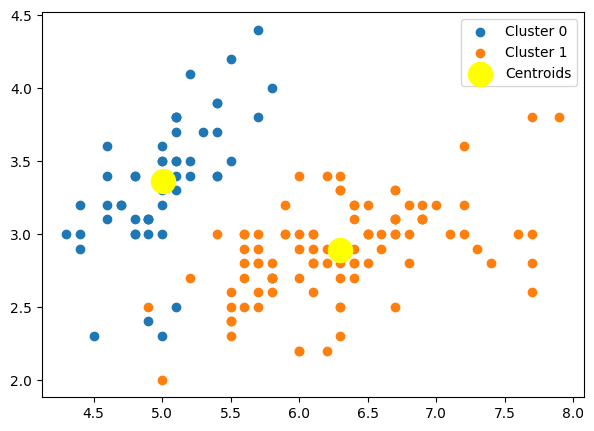

In [ ]:
#FINAL VISUALISATION
plt.figure(figsize = (7,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,c = 'yellow',
            label = 'Centroids')
plt.legend()